In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# !pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dschettler8845/brats-2021-task1")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\VIT\.cache\kagglehub\datasets\dschettler8845\brats-2021-task1\versions\1


In [4]:
import glob
ds = glob.glob(path)

In [5]:
import os
ds

['C:\\Users\\VIT\\.cache\\kagglehub\\datasets\\dschettler8845\\brats-2021-task1\\versions\\1']

In [6]:
os.listdir(path)

['BraTS2021_00495.tar', 'BraTS2021_00621.tar', 'BraTS2021_Training_Data.tar']

In [6]:
# import tarfile
# # open file
# file = tarfile.open(os.path.join(path,os.listdir(path)[2]))
# # extracting file
# file.extractall('./training')
# file.close()

In [7]:
train_nifty_file = "./training"

In [8]:
list_of_tain_nifty_file = os.listdir(train_nifty_file)
len(list_of_tain_nifty_file)

1204

In [7]:
list_of_tain_nifty_file

['.DS_Store',
 'BraTS2021_00000',
 'BraTS2021_00002',
 'BraTS2021_00003',
 'BraTS2021_00005',
 'BraTS2021_00006',
 'BraTS2021_00008',
 'BraTS2021_00009',
 'BraTS2021_00011',
 'BraTS2021_00012',
 'BraTS2021_00014',
 'BraTS2021_00016',
 'BraTS2021_00017',
 'BraTS2021_00018',
 'BraTS2021_00019',
 'BraTS2021_00020',
 'BraTS2021_00021',
 'BraTS2021_00022',
 'BraTS2021_00024',
 'BraTS2021_00025',
 'BraTS2021_00026',
 'BraTS2021_00028',
 'BraTS2021_00030',
 'BraTS2021_00031',
 'BraTS2021_00032',
 'BraTS2021_00035',
 'BraTS2021_00036',
 'BraTS2021_00043',
 'BraTS2021_00044',
 'BraTS2021_00045',
 'BraTS2021_00046',
 'BraTS2021_00048',
 'BraTS2021_00049',
 'BraTS2021_00051',
 'BraTS2021_00052',
 'BraTS2021_00053',
 'BraTS2021_00054',
 'BraTS2021_00056',
 'BraTS2021_00058',
 'BraTS2021_00059',
 'BraTS2021_00060',
 'BraTS2021_00061',
 'BraTS2021_00062',
 'BraTS2021_00063',
 'BraTS2021_00064',
 'BraTS2021_00066',
 'BraTS2021_00068',
 'BraTS2021_00070',
 'BraTS2021_00071',
 'BraTS2021_00072',
 'BraT

In [9]:
list_of_tain_nifty_file[1] , os.listdir(os.path.join(train_nifty_file,list_of_tain_nifty_file[1]))

('BraTS2021_00000',
 ['BraTS2021_00000_flair.nii.gz',
  'BraTS2021_00000_seg.nii.gz',
  'BraTS2021_00000_t1.nii.gz',
  'BraTS2021_00000_t1ce.nii.gz',
  'BraTS2021_00000_t2.nii.gz'])

In [10]:
for file in list_of_tain_nifty_file:
    try:
      split_file_name = os.listdir(os.path.join(train_nifty_file,file))
      file_number = file.split("_")[1]
      for file_in_split in split_file_name:
        number = file_in_split.split("_")[1]
        if number != file_number:
          print("Done Cheking the file name should be change",file,file_in_split)
    except:
      pass

flair.nii.gz
Shape of volume: (240, 240, 155)


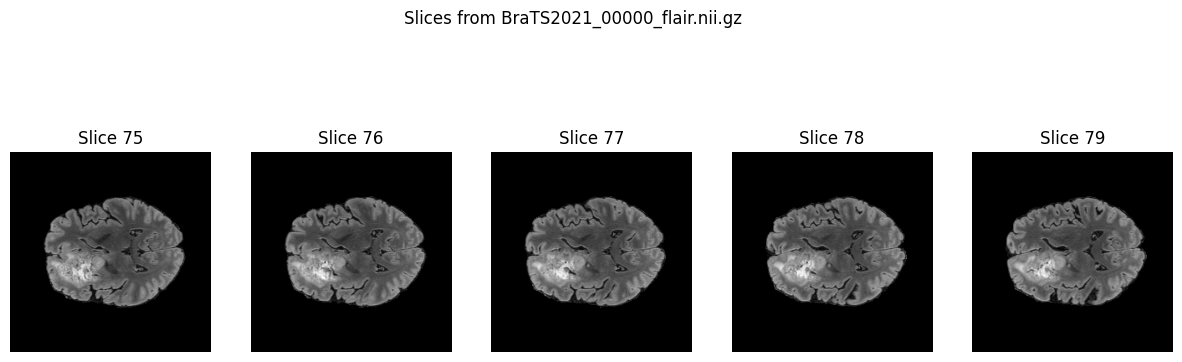

seg.nii.gz
Shape of volume: (240, 240, 155)


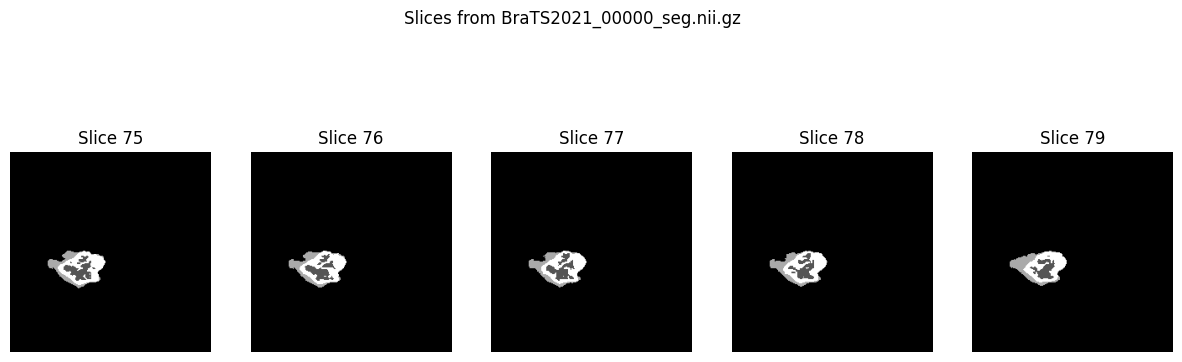

t1.nii.gz
Shape of volume: (240, 240, 155)


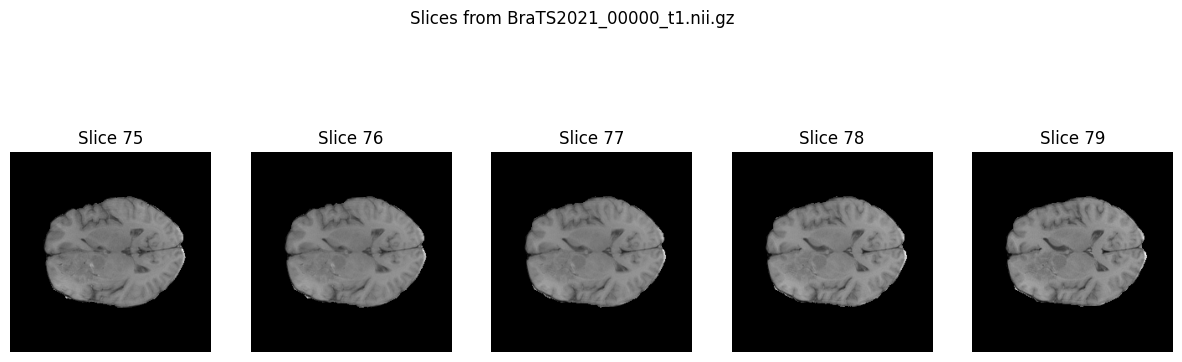

t1ce.nii.gz
Shape of volume: (240, 240, 155)


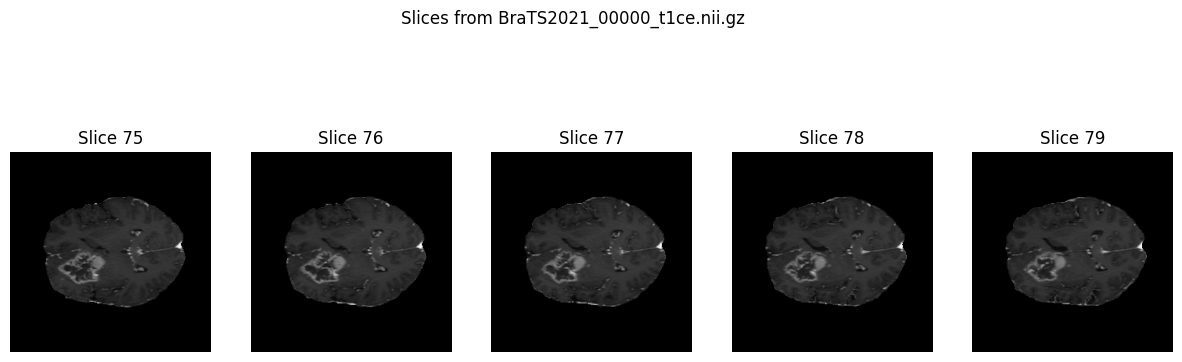

t2.nii.gz
Shape of volume: (240, 240, 155)


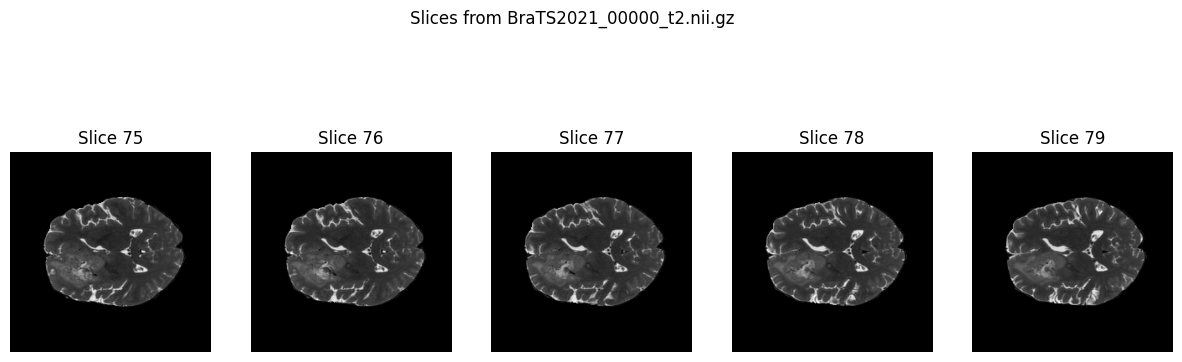

In [11]:
# !pip install nibabel
import nibabel as nib
import matplotlib.pyplot as plt
def visualize_one_nifty_file(nifty_file:str):
  for file in os.listdir(nifty_file):
    try:
      name= file.split("_")
      print(name[2])
      brain_vol = nib.load(os.path.join(nifty_file,file))
      brain_data = brain_vol.get_fdata()

      print(f"Shape of volume: {brain_data.shape}")
      mid_index = brain_data.shape[2] // 2  # Select the middle slice along the third dimension
      fig, axes = plt.subplots(1, 5, figsize=(15, 5))

      for i, ax in enumerate(axes):
          slice_idx = mid_index - 2 + i  # Take slices around the middle
          ax.imshow(brain_data[:, :, slice_idx], cmap="gray")
          ax.set_title(f"Slice {slice_idx}")
          ax.axis("off")

      plt.suptitle(f"Slices from {file}")
      plt.show()
    except Exception as e :
       print(e)
visualize_one_nifty_file(os.path.join(train_nifty_file,list_of_tain_nifty_file[1]))


In [12]:
import numpy as np
list_of_unwanted_file =[]
def read_one_nifty_file(nifty_file:str):
    try:
      for file in os.listdir(nifty_file):
          name= file.split("_")
          if "seg" in name[2]:
            brain_vol = nib.load(os.path.join(nifty_file,file))
            brain_data = brain_vol.get_fdata()
            if len(np.unique(brain_data)) != 4:
              list_of_unwanted_file.append(nifty_file)
    except:
        pass

In [14]:
# for file in list_of_tain_nifty_file:
#   read_one_nifty_file(os.path.join(train_nifty_file,file))

In [15]:
# import shutil
# count = 0
# for file in list_of_unwanted_file:
#   shutil.rmtree(file)
#   count +=1
# print(f"{count} Files removed")

In [16]:
# list_of_tain_nifty_file = os.listdir(train_nifty_file)
# print("Cleaned File : ",len(list_of_tain_nifty_file))

In [13]:
def check_label(file_path:str):
  try:
    for file in os.listdir(file_path):
        name= file.split("_")
        if "seg" in name[2]:
          brain_vol = nib.load(os.path.join(file_path,file))
          brain_data = brain_vol.get_fdata()
          if  np.any(brain_data == 4):
            brain_data[brain_data == 4] = 3
            relabeled_vol = nib.Nifti1Image(brain_data, brain_vol.affine, brain_vol.header)
            nib.save(relabeled_vol, os.path.join(file_path,f"{file}"))
            brain_data_change = nib.load(os.path.join(file_path,file)).get_fdata()
          else:
            pass
  except:
      pass

In [14]:
for file in list_of_tain_nifty_file:
  check_label(os.path.join(train_nifty_file,file))

# Preparing dataset for training Unet 3D

In [15]:
import os 
dataset = list()
count = 0
for file in os.listdir(train_nifty_file):
  try:
    if count == 700 :
        break
    PATH = os.path.join(train_nifty_file,file)
    image = []
    label = ""
    for nifty_file in os.listdir(PATH):
      if "seg" in nifty_file:
        label = os.path.join(PATH,nifty_file)
      else:
        image.append(os.path.join(PATH,nifty_file))
    dataset.append({
        "image":image,
        "label" : label
    })
    count +=1
  except:
    pass
    

In [ ]:
dataset

In [13]:
# !python -c "import monai" || pip install -q "monai-weekly[nibabel]"

In [16]:
from monai.data import CacheDataset, DataLoader
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, ScaleIntensityRanged,
    CropForegroundd, RandSpatialCropd, RandFlipd, RandRotate90d,
    ConcatItemsd, EnsureTyped, RandShiftIntensityd
)
from monai.networks.nets import UNet
from monai.losses import DiceLoss
from monai.metrics import DiceMetric

In [17]:
transforms = Compose([
    LoadImaged(keys=["image", "label"]),
    EnsureChannelFirstd(keys=["image", "label"]),
    ScaleIntensityRanged(
        keys=["image"], a_min=-200, a_max=200, b_min=0.0, b_max=1.0, clip=True
    ),
    CropForegroundd(keys=["image", "label"], source_key="image"),
    RandSpatialCropd(keys=["image", "label"], roi_size=(128, 128, 128), random_size=False),
    RandFlipd(keys=["image", "label"], spatial_axis=[0], prob=0.5),
    RandRotate90d(keys=["image", "label"], prob=0.5, max_k=3),
    RandShiftIntensityd(keys=["image"], offsets=0.1, prob=0.5),
    ConcatItemsd(keys=["image"], name="image"),
    EnsureTyped(keys=["image", "label"]),
])

C:\Users\VIT\AppData\Roaming\Python\Python310\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` was changed in version 1.5 from `allow_smaller=True` to `allow_smaller=False`.
  warn_deprecated(argname, msg, warning_category)


In [18]:
from monai.data import Dataset
data_with_transforms = Dataset(data=dataset, transform=transforms)
data_loader = DataLoader(data_with_transforms, batch_size=8, shuffle=True)

In [19]:
data_loader

In [38]:
import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(
    spatial_dims=3,
    in_channels=4,  # Four modalities
    out_channels=4,  # Three classes
    channels=(32, 64, 128, 256, 512),
    strides=(2, 2, 2, 2),
    num_res_units=2,
).to(device)

In [37]:
# !pip3 install numpy


In [39]:
import torch 
from monai.metrics import compute_iou, compute_hausdorff_distance
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
loss_function = DiceLoss(to_onehot_y=True, softmax=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Initialize lists to store metrics
dice_losses = []
iou_scores = []
dice_coeffs = []
precisions = []
recalls = []
f1_scores = []
mae_scores = []
hausdorff_distances = []
pixel_accuracies = []
compute_meandice = DiceMetric()
# Variables to save the best model
best_dice_score = 0.0
best_model_path = "best_model.pth"
last_model_path = "last_model.pth"


# # Training loop
for epoch in range(100):
    model.train()
    epoch_loss = 0
    for batch in data_loader:
        images = batch["image"].to(device)
        labels = batch["label"].to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {epoch_loss/len(data_loader)}")

Epoch 1, Loss: 0.8295978280630979
Epoch 2, Loss: 0.7946621179580688
Epoch 3, Loss: 0.7640355188738216
Epoch 4, Loss: 0.7425828257744963
Epoch 5, Loss: 0.7212790447202596
Epoch 6, Loss: 0.6971700862050056
Epoch 7, Loss: 0.6770434487949718
Epoch 8, Loss: 0.665734089910984
Epoch 9, Loss: 0.6559385257688436
Epoch 10, Loss: 0.6574112136255611
Epoch 11, Loss: 0.6415298499844291
Epoch 12, Loss: 0.6364551653916185
Epoch 13, Loss: 0.6323734013871714
Epoch 14, Loss: 0.6224519874561917
Epoch 15, Loss: 0.6259923468936573
Epoch 16, Loss: 0.6248038323088125
Epoch 17, Loss: 0.620338146659461
Epoch 18, Loss: 0.6123224815184419
Epoch 19, Loss: 0.6092021715911952
Epoch 20, Loss: 0.6074646674096584
Epoch 21, Loss: 0.611081219532273
Epoch 22, Loss: 0.602262676439502
Epoch 23, Loss: 0.6027520251545039
Epoch 24, Loss: 0.6103676059706644
Epoch 25, Loss: 0.602664416147904
Epoch 26, Loss: 0.6028022231026129
Epoch 27, Loss: 0.5991250242699276
Epoch 28, Loss: 0.5977757214145227
Epoch 29, Loss: 0.5962551019408486

KeyboardInterrupt: 

In [41]:
torch.save(model.state_dict() , f"BrainSeg_Model/Brain_{epoch}.pt")